In [188]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 1. Решите линейную систему:                
### $\begin{vmatrix} 
1 & 2 & 3 \\
4 & 0 & 6 \\
7 & 8 & 9
\end{vmatrix} * X = \begin{vmatrix} 
12 \\
2 \\
1
\end{vmatrix} $

In [189]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])

In [190]:
B = np.array ([12,2,1])

In [191]:
np.linalg.solve(A,B)

array([-9.2       ,  0.9       ,  6.46666667])

### 2. Найдите псевдорешение:
x + 2y – z = 1 <br> 3x – 4y = 7 <br>8x – 5y + 2z = 12 <br>2x – 5z = 7 <br>11x +4y – 7z = 15 <br>


In [192]:
A = np.array([[1, 2,-1],[3, -4, 0],[8, -5, 2],[2, 0, -5],[11, 4, -7]])

In [193]:
B = np.array ([1, 7, 12, 7, 15])

In [194]:
np.linalg.lstsq(A, B)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [195]:
np.dot(A,[ 1.13919353, -0.90498444, -0.9009803 ])

array([ 0.23020495,  7.03751835, 11.83650984,  6.78328856, 15.21805317])

### 3. Сколько решений имеет линейная система:
### $\begin{vmatrix} 1 & 2 & 3 \\4 & 5 & 6 \\7 & 8 & 9\end{vmatrix} * X = \begin{vmatrix} 12 \\2 \\1\end{vmatrix} $
Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 

In [196]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [197]:
B = np.array([[12, 2, 1]])

In [198]:
round(np.linalg.det(A),4)

-0.0

Определитель матрицы равен 0.

In [199]:
C = np.concatenate((A,B.T), axis =1)

In [200]:
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

(2, 3)

Ранг расширенной матрицы больше,чем ранг матрицы коэффициентов, поэтому данная система не имеет решений. 

Изменим правую часть, чтобы определить стал отличным от 0

In [201]:
A = np.array([[10, 2, 3], [4, 5, 6], [7, 8, 9]])
round(np.linalg.det(A),4)

-27.0

In [202]:
B = np.array([12, 2, 1])

Найдем решения новой системы

In [203]:
np.linalg.solve(A, B)

array([ 1.        , -6.        ,  4.66666667])

### 4. Вычислите LU-разложение матрицы:
### $\begin{vmatrix} 1 & 2 & 3 \\2 & 16 & 21 \\4 & 28 & 73\end{vmatrix}$ <br>
После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [204]:
A = np.array([[1, 2, 3], [2, 16, 21], [4, 28, 73]])

In [205]:
np.linalg.det(A)

432.00000000000017

In [206]:
P, L, U = scipy.linalg.lu(A)

In [207]:
print('P : \n',P,'\n')
print('L : \n',L,'\n')
print('U : \n',U,'\n')

P : 
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] 

L : 
 [[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]] 

U : 
 [[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]] 



In [208]:
np.matmul(P, np.matmul(L, U))

array([[ 1.,  2.,  3.],
       [ 2., 16., 21.],
       [ 4., 28., 73.]])

In [209]:
B = np.array([30, 42, -8])

In [210]:
np.linalg.solve(A, B)

array([34.36111111,  1.90277778, -2.72222222])

### 5. Найдите нормальное псевдорешение недоопределенной системы:
x + 2y – z = 1 <br>
8x – 5y + 2z = 12 <br>
Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 



In [211]:
def Q(x):
    return (x**2 + (10*x -14)**2 + (21*x-29)**2)

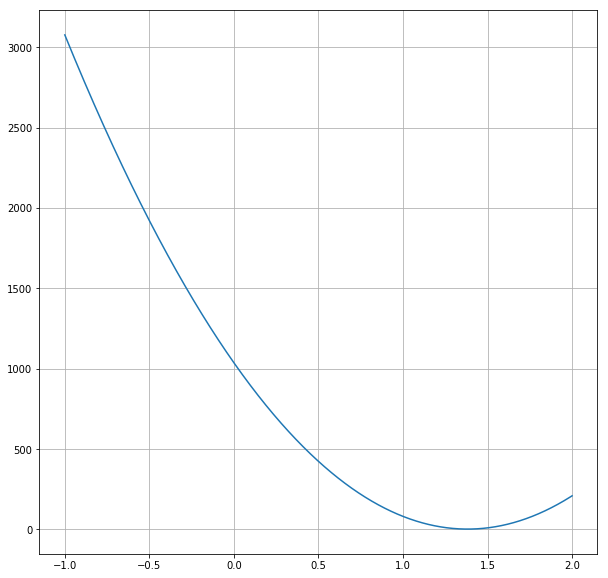

In [212]:
plt.figure(figsize=(10,10))


x = np.linspace(-1, 2, 2000)
plt.plot(x, Q(x))
plt.grid(True)
plt.show()

In [213]:
A = np.array([[1, 2, -1], [8, -5, 2]])

In [214]:
B = np.array([1, 12])

In [215]:
np.linalg.lstsq(A, B)

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

### 6. Найдите одно из псевдорешений вырожденной системы:


### $\begin{vmatrix} 1 & 2 & 3 \\4 & 5 & 6 \\7 & 8 & 9\end{vmatrix} * X = \begin{vmatrix} 2 \\5 \\11\end{vmatrix} $
Попробуйте также отыскать и нормальное псевдорешение.

In [216]:
A = np.array([[1, 2, 3],[4, 5, 6], [7, 8, 9]])

In [217]:
B = np.array([2, 5, 11])

In [218]:
Q,R = np.linalg.qr(A)

In [219]:
print('A : \n',A,'\n')
print('Q : \n',Q,'\n')
print('R : \n',R,'\n')

A : 
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 

Q : 
 [[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]] 

R : 
 [[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]] 



In [220]:
np.dot(Q, R)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [221]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [222]:
B1 = np.dot(Q.T, B)[:2]
B1

array([-1.21860576e+01,  8.54871729e-15])

In [223]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.45096256e-15])

In [224]:
X = np.append(X1,0)
print(X)
np.linalg.norm(X)

[1.50000000e+00 9.45096256e-15 0.00000000e+00]


1.4999999999999893

In [225]:
np.linalg.norm(np.dot(A, X) -B)

1.2247448713915885

одно из псевдорешений равно X

In [226]:
print(X)

[1.50000000e+00 9.45096256e-15 0.00000000e+00]


#### Найдем нормальное псевдорешение. <br>
Для этого сначала найдем вектор R2

In [227]:
R2 = np.array([R[:2,-1]])
R2

array([[-11.07823419,   1.80906807]])

$R_1 * X_1 + R_2 *X_2 = Q ^ T *B$ <br>

Отсюда вектор коэффициентов A =

In [228]:
A_ = np.concatenate((R1, R2.T), axis =1)

In [229]:
A_

array([[ -8.1240384 ,  -9.6011363 , -11.07823419],
       [  0.        ,   0.90453403,   1.80906807]])

In [231]:
np.linalg.lstsq(A_, B1)

(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([16.84810335,  1.06836951]))

In [232]:
x = np.array([1.25, 0.5, -0.25])

In [233]:
np.linalg.norm(x), np.linalg.norm(np.dot(A,x)-B)

(1.3693063937629153, 1.224744871391589)